In [2]:


import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

path = r'E:\experiment data\aluminum\2021-03-30\20210330.is_tens_RawData'
tension_df_orginal = pd.read_csv(path + '/normal.csv', encoding='CP949')
tension_df = tension_df_orginal[:tension_df_orginal.하중.argmax()]

fig, ax = plt.subplots(figsize=[6.2, 5]) # figsize=[5, 5]



name = [r'$P_0$','$P_1$','$P_2$', '$P_3$','$P_4$']
list = [0,2,4,5,6]
count = 0
for i in list:
    ax.scatter(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*i)], tension_df.하중.max()/6*i, color='red',alpha=1)

plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*0)]+0.02, tension_df.하중.max()/6*0+300, name[0], fontsize=9)
plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*2)]-0.07, tension_df.하중.max()/6*2+50, name[1], fontsize=9)
plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*4)]-0.07, tension_df.하중.max()/6*4+50,name[2], fontsize=9)
plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*5)]-0.07, tension_df.하중.max()/6*5+50, name[3], fontsize=9)
plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*6)]-0.08, tension_df.하중.max()/6*6+50, name[4], fontsize=9)
ax.plot(tension_df_orginal.연신,tension_df_orginal.하중, color= 'black', zorder = 0)
ax.tick_params(direction='in', pad=10,which='both')
ax.set_ylabel('Force (N)')
ax.set_xlabel('Displacement (mm)')
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.minorticks_on()

textstr=' $P_0$ = 0% \n $P_1$ = 33% $P_{max}$\n $P_2$ = 67% $P_{max}$\n $P_3$ = 83% $P_{max}$\n $P_4$ = $P_{max}$'
props = dict(facecolor='white')
ax.text(0.055, 0.71, textstr, transform=ax.transAxes, fontsize=13,
        horizontalalignment='left', bbox=props)



plt.tight_layout()
plt.savefig(r'C:\Users\ghrms\OneDrive - 경북대학교(1)\1_ML/graph.png',dpi=500,pad_inches=0)
plt.show()


['C:\\Users\\Mechano_2',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\python37.zip',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\DLLs',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final',
 '',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Mechano_2\\.ipython',
 'C:\\Users\\Mechano_2\\PycharmProjects\\pro']

---
# Fig.1 (a)

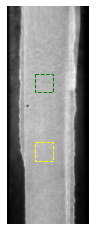

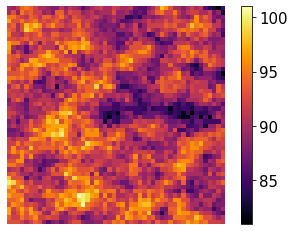

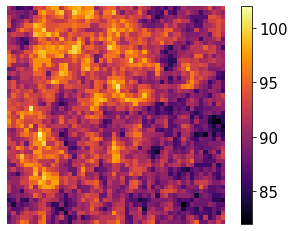

In [14]:
from scipy import signal
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches

reference = cv2.imread('../data_new/num_00001.jpg',cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots()
ax.imshow(reference[100:700, :-30], cmap='gray')
ax.add_patch(
     patches.Rectangle(
        (75, 185),
        50,
        50,
        edgecolor = 'green',
        facecolor = 'black',
        fill=False, lw=1, ls='--'
     ) )

ax.add_patch(
     patches.Rectangle(
        (75, 375),
        50,
        50,
        edgecolor = 'yellow',
        facecolor = 'black',
        fill=False, lw=1, ls='--'
     ) )
ax.axis('off')
plt.savefig('../data_new/fig1a_1.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

plt.imshow(reference[100+185:100+185+50, 75:75+50],cmap='inferno')
plt.axis('off')
plt.colorbar()
plt.savefig('../data_new/fig1a_2.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

plt.imshow(reference[100+375:100+375+50, 75:75+50],cmap='inferno')
plt.axis('off')
plt.colorbar()
plt.savefig('../data_new/fig1a_3.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

---
# Fig.1 (b)

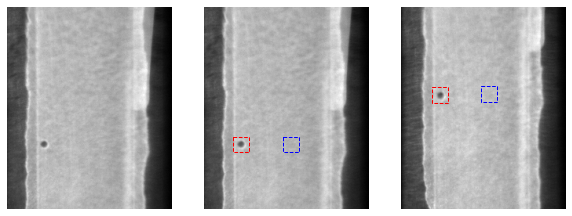

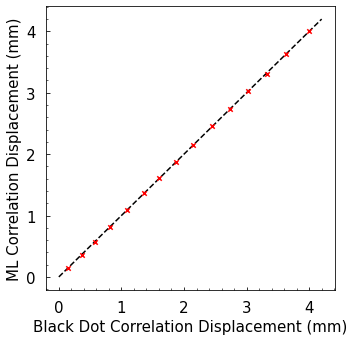

In [1]:
from scipy import signal
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches

reference = cv2.imread('../data_new/num_00001.jpg',cv2.IMREAD_GRAYSCALE)
deformed = cv2.imread('../data_new/num_08002.jpg',cv2.IMREAD_GRAYSCALE)


px1, px2 = 10, 220
py1, py2 = 200, 458

fig, ax = plt.subplots(1,3 ,figsize=(10,5))
ax[0].imshow(reference[py1:py2, px1:px2], cmap='gray')
ax[0].axis('off')

ax[1].imshow(reference[py1:py2, px1:px2], cmap='gray')
ax[1].axis('off')
ax[1].add_patch(
     patches.Rectangle(
        (47-px1, 365-py1),
        20,
        20,
        edgecolor = 'Red',
        facecolor = 'black',
        fill=False, lw=1, ls='--'
     ) )
ax[1].add_patch(
     patches.Rectangle(
        (111-px1, 365-py1),
        20,
        20,
        edgecolor = 'blue',
        facecolor = 'black',
        fill=False, lw=1, ls='--'
     ) )


ax[2].imshow(deformed[py1:py2, px1:px2], cmap='gray')
ax[2].axis('off')
ax[2].add_patch(
     patches.Rectangle(
        (49-px1, 302-py1),
        20,
        20,
        edgecolor = 'Red',
        facecolor = 'black',
        fill=False, lw=1, ls='--'
     ) )
ax[2].add_patch(
     patches.Rectangle(
        (112-px1, 301-py1),
        20,
        20,
        edgecolor = 'blue',
        facecolor = 'black',
        fill=False, lw=1, ls='--'
     ) )

plt.savefig('../data_new/fig1b_1.png',dpi=300,bbox_inches='tight' )

plt.show()
plt.close()

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5,5))
deformed_good = np.abs(np.array([381, 374, 367, 359, 350, 341, 333, 324, 315, 305, 296, 286, 276, 266, 254])-386)/33
deformed    =   np.abs(np.array([381, 374, 367, 359, 350, 341, 333, 324, 315, 305, 296, 286, 277, 266, 254])-386)/33

ax.plot([0,deformed_good[-1]+0.2],[0, deformed[-1]+0.2], color='black', zorder=1, ls='--')
ax.scatter(deformed_good,deformed, color='red', s=20,marker='x', zorder=2)
ax.set_xlabel('Black Dot Correlation Displacement (mm)')
ax.set_ylabel('ML Correlation Displacement (mm)')
ax.tick_params(direction='in', pad=10,which='both')
ax.minorticks_on()
plt.tight_layout()
plt.savefig('../data_new/fig1b_2.png',dpi=300,bbox_inches='tight')

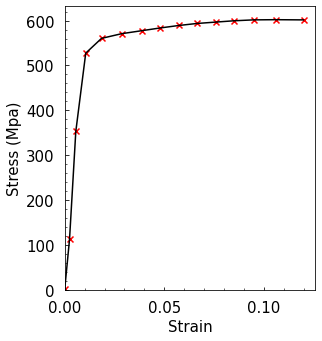

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import mecha.DIC as dic
from scipy import io
import mecha.fracture as fracture
import matplotlib

min_range = 0
max_range = 18000

tension_data = np.array(pd.read_csv('../data_new/Tension image strain box/tension/tension_1.csv', encoding='CP949'))
time, strain, stress = tension_data[:, 0], tension_data[:, 4]*10/25, tension_data[:, 3]*3000/18
stress = savgol_filter(stress[min_range:max_range],201,1)
strain = savgol_filter(strain[min_range:max_range],201,1)
time = time[min_range:max_range]
image = dic.load_file('../data')

df = pd.DataFrame(columns=['image_name', 'voltage_strain','voltage_stress','using_DIC_mask_strain',
                       'DIC_exx', 'DIC_eyy', 'DIC_exy'])

for num in range(1,15+1):
    file_num = str(num)
    uu_resize = io.loadmat('../data_new/Tension image strain box/tension/'+file_num+'_uu.mat')['uu']
    vv_resize = io.loadmat('../data_new/Tension image strain box/tension/'+file_num+'_vv.mat')['vv']
    exx = io.loadmat('../data_new/Tension image strain box/tension/'+file_num+'_exx.mat')['exx']
    eyy = io.loadmat('../data_new/Tension image strain box/tension/'+file_num+'_eyy.mat')['eyy']
    exy = io.loadmat('../data_new/Tension image strain box/tension/'+file_num+'_exy.mat')['exy']
    ee_resize = fracture.effective_strain_z(0.33,exx, eyy, exy)
    ee_mask = np.where(ee_resize>0, 255, ee_resize*0).astype('uint8')

    if num==1:
        zero_ee_mask = ee_mask

    image_name = int(list(image.keys())[num-1].split('_')[1])
    voltage_strain = strain[int(list(image.keys())[num-1].split('_')[1])]
    voltage_stress = stress[int(list(image.keys())[num-1].split('_')[1])]
    using_DIC_mask_strain = np.average(dic.find_zone(ee_resize)[15:-15, 15:-15])

    DIC_eyy = np.average(dic.find_zone(eyy)[15:-15, 15:-15])
    DIC_exx = np.average(dic.find_zone(exx)[15:-15, 15:-15])
    DIC_exy = np.average(dic.find_zone(exy)[15:-15, 15:-15])
    row = pd.Series([image_name, voltage_strain,voltage_stress,using_DIC_mask_strain,
                     DIC_exx, DIC_eyy, DIC_exy],
                index=['image_name', 'voltage_strain','voltage_stress','using_DIC_mask_strain',
                       'DIC_exx', 'DIC_eyy', 'DIC_exy'])
    df = df.append(row, ignore_index=True)
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df.DIC_eyy,df.voltage_stress,color ='black')
ax.scatter(df.DIC_eyy,df.voltage_stress,color='red',marker='x')
ax.set_xlabel('Strain')
ax.set_ylabel('Stress (Mpa)')
ax.tick_params(direction='in', pad=10,which='both')
ax.minorticks_on()
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.tight_layout()

# plt.savefig('../data_new/fig1c_1.png',dpi=300,bbox_inches='tight')
# df.to_pickle('../paper_code_epoxyml/tension.pkl')
plt.show()

---
# Fig.1 (c)

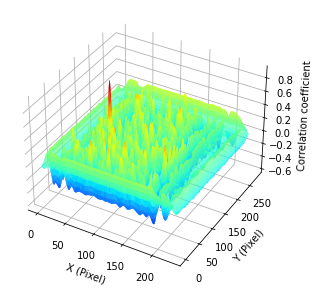

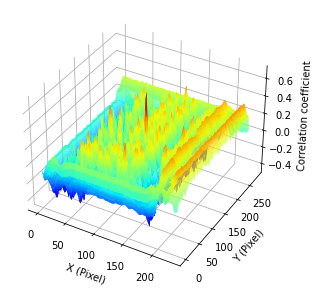

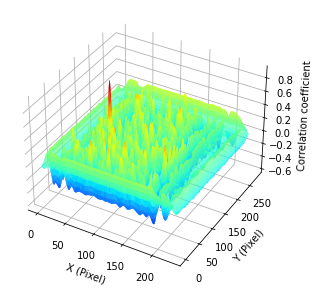

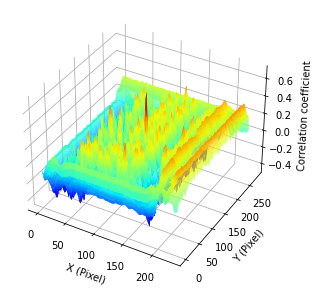

In [209]:
import mecha.DIC as dic
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mecha.fracture as fracture
from scipy import io


field = io.loadmat('../data_new/colleration_field.mat')['c']
black = io.loadmat('../data_new/colleration_black.mat')['c']

x = np.linspace(0, np.shape(field)[1], np.shape(field)[1])
y = np.linspace(0, np.shape(field)[0], np.shape(field)[0])
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(5,5) )
ax.plot_surface(X, Y, black, cmap='jet', edgecolor=None,  rstride=1, cstride=1)
ax.set_xlabel('X (Pixel)')
ax.set_ylabel('Y (Pixel)')
ax.set_zlabel('Correlation coefficient')
ax.view_init(35)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.savefig('../data_new/fig1b_3.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(5,5))
ax.plot_surface(X, Y, field, cmap='jet', edgecolor=None,  rstride=1, cstride=1)
ax.set_xlabel('X (Pixel)')
ax.set_ylabel('Y (Pixel)')
ax.set_zlabel('Correlation coefficient')
ax.view_init(35)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.savefig('../data_new/fig1b_4.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
import mecha.DIC as dic
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mecha.fracture as fracture
from scipy import io

for i in range(10):
    exx = io.loadmat('../data_new/Tension image strain box/'+i+'_exx.mat')['exx']
    eyy = io.loadmat('../data_new/Tension image strain box/'+i+'_eyy.mat')['eyy']
    exy = io.loadmat('../data_new/Tension image strain box/'+i+'_exy.mat')['exy']

---
# Tension image strain box

Run complete


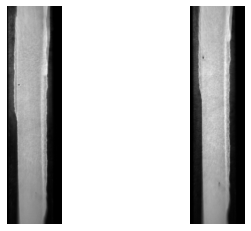

<Figure size 432x288 with 0 Axes>

In [1]:
import mecha.DIC as dic
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mecha.fracture as fracture
from scipy import io


image1 = cv2.imread('../data_new/Tension image strain box/num_01002.jpg', cv2.IMREAD_GRAYSCALE)
exx_1 = io.loadmat('../data_new/Tension image strain box/1'+'_exx.mat')['exx']


exx = io.loadmat('../data_new/Tension image strain box/2'+'_exx.mat')['exx']
eyy = io.loadmat('../data_new/Tension image strain box/2'+'_eyy.mat')['eyy']
exy = io.loadmat('../data_new/Tension image strain box/2'+'_exy.mat')['exy']
uu = io.loadmat('../data_new/Tension image strain box/2'+'_uu.mat')['uu']
vv = io.loadmat('../data_new/Tension image strain box/2'+'_vv.mat')['vv']
image2 = cv2.imread('../data_new/Tension image strain box/num_15002.jpg', cv2.IMREAD_GRAYSCALE)
ee2 = fracture.effective_strain_z(0.33,exx, eyy, exy)

fig, ax = plt.subplots(1,2)
ax[0].imshow(image1, cmap='gray')
ax[0].axis('off')

ax[1].imshow(image2, cmap='gray')
ax[1].axis('off')
plt.show()
plt.close()
plt.savefig('../data_new/fig2a_1.png',dpi=300,bbox_inches='tight')

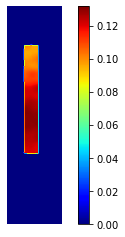

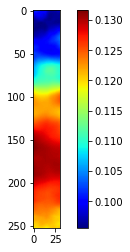

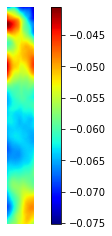

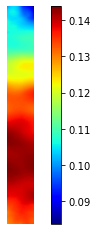

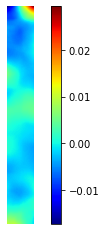

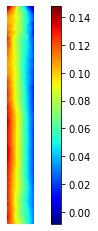

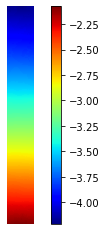

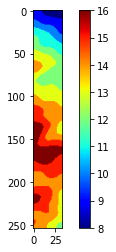

In [3]:
resize = cv2.resize(ee2,(0,0),fx=1,fy=1)
resize_mask = np.where(resize>0,255,resize).astype('uint8')
image_mask = np.where(resize>0,0,255).astype('uint8')
strain_exx = cv2.copyTo(exx,resize_mask)
strain_eyy = cv2.copyTo(eyy,resize_mask)
strain_exy = cv2.copyTo(exy,resize_mask)
strain= cv2.copyTo(resize,resize_mask)

plt.imshow(strain, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.savefig('../data_new/fig2a_2.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

plt.imshow(dic.find_zone(strain)[1:-1,1:-1], cmap='jet')
plt.colorbar()
plt.axis('off')
plt.savefig('../data_new/fig2a_ee.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

plt.imshow(dic.find_zone(strain_exx)[1:-1,1:-1], cmap='jet')
plt.colorbar()
plt.axis('off')
plt.savefig('../data_new/fig2a_exx.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

plt.imshow(dic.find_zone(strain_eyy)[1:-1,1:-1], cmap='jet')
plt.colorbar()
plt.axis('off')
plt.savefig('../data_new/fig2a_eyy.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

plt.imshow(dic.find_zone(strain_exy)[1:-1,1:-1], cmap='jet')
plt.colorbar()
plt.axis('off')
plt.savefig('../data_new/fig2a_exy.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

plt.imshow(dic.find_zone(uu)[1:-1,1:-1]/33, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.savefig('../data_new/fig2a_uu.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

plt.imshow(dic.find_zone(vv)[1:-1,1:-1]/33, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.savefig('../data_new/fig2a_vv.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

src_image = cv2.resize(image1,(0,0),fx=0.5,fy=0.5)[158:378,36:72]
src_image = cv2.resize(src_image, dsize=(34,254))
dst_image = cv2.resize(image2,(0,0),fx=0.5,fy=0.5)[91:345,39:73]
sub_image = cv2.GaussianBlur(cv2.subtract(dst_image,src_image),(0,0),6)

plt.imshow(sub_image,cmap='jet')
plt.colorbar()
# plt.axis('off')
plt.savefig('../data_new/fig2a_ml.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

---
# CTS image

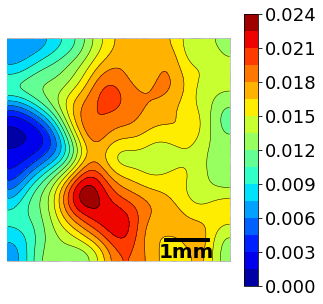

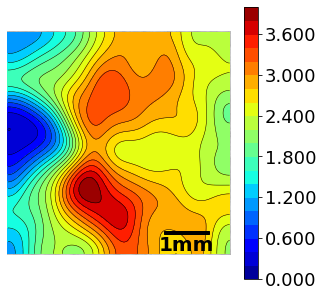

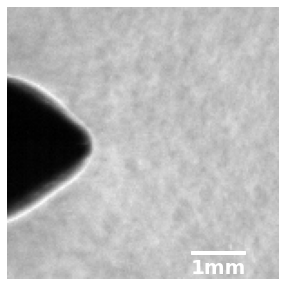

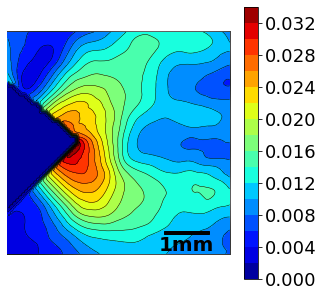

In [6]:
import mecha.DIC as dic
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mecha.fracture as fracture
from scipy import io
import mecha.DIC as dic
import matplotlib.patches as patches

j = 4
ml_slope = 170

image = dic.load_file('../data_new/CTS')
left, right, up_down = 50,100,75

crack_tip = [[401,208],[395,211],[391,206],[388,207],[385,203]] # y, x
contour_level = 20
ref = list(image.keys())[0]
cur = list(image.keys())[j]
src_reference = image[ref][:,:,1][crack_tip[0][0]-up_down:crack_tip[0][0]+up_down,crack_tip[0][1]-left:crack_tip[0][1]+right]
src_current = image[cur][:,:,1][crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]

dst = cv2.subtract(src_current.astype('float64'),src_reference.astype('float64')).astype(float)
dst = np.where(dst>10, dst*0, dst)
dst = np.where(dst<0, dst*0, dst)
gas = cv2.GaussianBlur(dst,(0,0),10)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(src_current, cmap='gray')
# plt.axis('off')
csf = ax.contourf(gas/ml_slope, contour_level, cmap = 'jet')
CS = ax.contour(gas/ml_slope, contour_level, colors='black', linewidths = 0.5)
cbar= plt.colorbar(csf, format='%0.3f')
cbar.ax.tick_params(labelsize=18)
ax.add_patch(
     patches.Rectangle(
        (105, 134),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold')
plt.axis('off')
plt.savefig('../data_new/CTS/{}_contour_나누기.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(src_current, cmap='gray')
# plt.axis('off')
csf = ax.contourf(gas, contour_level, cmap = 'jet')
CS = ax.contour(gas, contour_level, colors='black', linewidths = 0.5)
cbar= plt.colorbar(csf, format='%0.3f')
cbar.ax.tick_params(labelsize=18)
ax.add_patch(
     patches.Rectangle(
        (105, 134),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold')
plt.axis('off')

plt.savefig('../data_new/CTS/{}_contour.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(src_current, cmap='gray')
ax.add_patch(
     patches.Rectangle(
        (101, 134),
        30,
        2,
        edgecolor = 'white',
        facecolor = 'white',
        fill=True
     ) )
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold', color='white')
plt.axis('off')
plt.savefig('../data_new/CTS/{}_raw.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()

g_frame= np.where(src_current>40, 0,255)
h, w = g_frame.shape
img = np.ones([h, w, 4], np.uint8) * (0, 0, 0, 0)
img[:,:,3] = g_frame
cv2.imwrite('../data_new/CTS/{}_mask.png'.format(str(j)), img)


uu = io.loadmat('../data_new/CTS/data'+'/'+str(j)+'_uu.mat')['uu']
vv = io.loadmat('../data_new/CTS/data'+'/'+str(j)+'_vv.mat')['vv']
exx = io.loadmat('../data_new/CTS/data'+'/'+str(j)+'_exx.mat')['exx']
eyy = io.loadmat('../data_new/CTS/data'+'/'+str(j)+'_eyy.mat')['eyy']
exy = io.loadmat('../data_new/CTS/data'+'/'+str(j)+'_exy.mat')['exy']
ee = fracture.effective_strain_z(0.33,exx, eyy, exy)
uu_resize = cv2.resize(uu,(0,0),fx=2, fy=2 )
vv_resize = cv2.resize(vv,(0,0),fx=2, fy=2 )
exx_resize = cv2.resize(exx,(0,0),fx=2, fy=2 )
eyy_resize = cv2.resize(eyy,(0,0),fx=2, fy=2 )
exy_resize = cv2.resize(exy,(0,0),fx=2, fy=2 )
ee_resize = cv2.resize(ee,(0,0),fx=2, fy=2 )

ee_dic = ee_resize[crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]
ee_dic = ee_dic.astype(float)
ee_dic = np.where(ee_dic>10, ee_dic*0, ee_dic)


fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(
     patches.Rectangle(
        (105, 134),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold')
ax.imshow(ee_dic, cmap='gray')
csf = ax.contourf(ee_dic, contour_level, cmap = 'jet')
CS = ax.contour(ee_dic, contour_level, colors='black', linewidths = 0.5)
cbar= plt.colorbar(csf, format='%0.3f')
cbar.ax.tick_params(labelsize=18)
plt.axis('off')
plt.savefig('../data_new/CTS/{}_dic_ee.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()

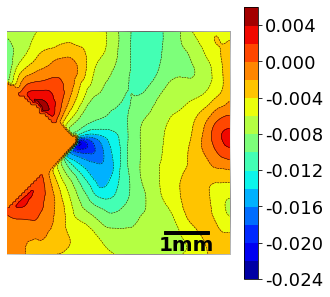

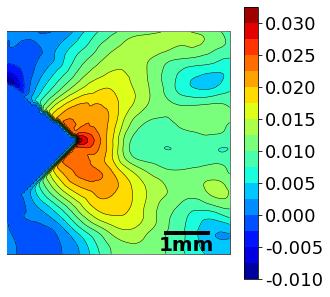

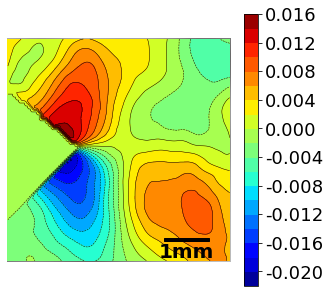

In [8]:
j = 4

exx_dic = exx_resize[crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]
exx_dic = exx_dic.astype(float)
exx_dic = np.where(exx_dic>10, exx_dic*0, exx_dic)

eyy_dic = eyy_resize[crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]
eyy_dic = eyy_dic.astype(float)
eyy_dic = np.where(eyy_dic>10, eyy_dic*0, eyy_dic)

exy_dic = exy_resize[crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]
exy_dic = exy_dic.astype(float)
exy_dic = np.where(exy_dic>10, exy_dic*0, exy_dic)

uu_dic = uu_resize[crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]
uu_dic = uu_dic.astype(float)
uu_dic = np.where(uu_dic>10, uu_dic*0, uu_dic)

vv_dic = vv_resize[crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]
vv_dic = vv_dic.astype(float)
vv_dic = np.where(vv_dic>10, vv_dic*0, vv_dic)


fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(
     patches.Rectangle(
        (105, 134),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold')
ax.imshow(exx_dic, cmap='gray')
csf = ax.contourf(exx_dic, contour_level, cmap = 'jet')
CS = ax.contour(exx_dic, contour_level, colors='black', linewidths = 0.5)
cbar= plt.colorbar(csf, format='%0.3f')
plt.axis('off')
cbar.ax.tick_params(labelsize=18)
plt.savefig('../data_new/CTS/{}_dic_exx.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(
     patches.Rectangle(
        (105, 134),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold')
ax.imshow(eyy_dic, cmap='gray')
csf = ax.contourf(eyy_dic, contour_level, cmap = 'jet')
CS = ax.contour(eyy_dic, contour_level, colors='black', linewidths = 0.5)
cbar= plt.colorbar(csf, format='%0.3f')
cbar.ax.tick_params(labelsize=18)
plt.axis('off')
plt.savefig('../data_new/CTS/{}_dic_eyy.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(
     patches.Rectangle(
        (105, 134),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold')
ax.imshow(exy_dic, cmap='gray')
csf = ax.contourf(exy_dic, contour_level, cmap = 'jet')
CS = ax.contour(exy_dic, contour_level, colors='black', linewidths = 0.5)
cbar= plt.colorbar(csf, format='%0.3f')
plt.axis('off')
cbar.ax.tick_params(labelsize=18)
plt.savefig('../data_new/CTS/{}_dic_exy.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()

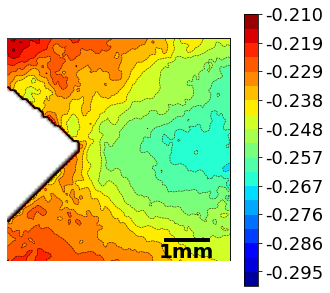

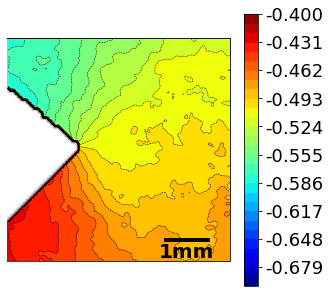

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(
     patches.Rectangle(
        (105, 134),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )
plt.axis('off')
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold')
ax.imshow(uu_dic, cmap='gray')
levels = np.linspace(-0.3,-0.21,20)
csf = ax.contourf(uu_dic, levels, cmap = 'jet')
CS = ax.contour(uu_dic, levels, colors='black', linewidths = 0.5)
cbar= plt.colorbar(csf, format='%0.3f')
cbar.ax.tick_params(labelsize=18)
plt.savefig('../data_new/CTS/{}_dic_uu.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(
     patches.Rectangle(
        (105, 134),
        30,
        2,
        edgecolor = 'black',
        facecolor = 'black',
        fill=True
     ) )
plt.axis('off')
levels = np.linspace(-0.7,-0.4,30)
plt.text( 101,147, '1mm', fontsize=20, fontweight='bold')
ax.imshow(vv_dic, cmap='gray')
csf = ax.contourf(vv_dic, levels, cmap = 'jet')
CS = ax.contour(vv_dic, levels, colors='black', linewidths = 0.5)
cbar= plt.colorbar(csf, format='%0.3f')
cbar.ax.tick_params(labelsize=18)
plt.savefig('../data_new/CTS/{}_dic_vv.png'.format(str(j)),dpi=300,bbox_inches='tight')
plt.show()
plt.close()